# 工厂数据集探索性分析

In [1]:
import os
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = [
    'Noto Sans CJK SC',
    'Noto Serif CJK SC',
    'WenQuanYi Zen Hei',
    'WenQuanYi Micro Hei',
    'SimHei', 'SimSun', 'FangSong'
]
plt.rcParams['axes.unicode_minus'] = False  

## 1. data load

In [2]:
train_dir = "/root/autodl-tmp/seat_dataset/chengdu_customer"
valid_dir = "/root/autodl-tmp/seat_dataset/chengdu_valid"
ann_file = "_annotations.coco.json"
cls_file = "_classification.coco.json"

In [3]:
def load_coco_file(root_dir, file_name):
    coco_fp = os.path.join(root_dir, file_name)
    with open(coco_fp, 'r', encoding='utf-8') as f:
        coco_data = json.load(f)
    for k in ('categories', 'images', 'annotations'):
        coco_data[k] = pd.DataFrame(coco_data[k])
    cat_df = coco_data['categories'][['id', 'name']]
    ann_df = coco_data['annotations']
    ann_df = ann_df.merge(cat_df, left_on='category_id', right_on='id', how='left')
    
    bbox_array = np.stack(ann_df['bbox'].values)
    ann_df['w'] = bbox_array[:, 2]
    ann_df['h'] = bbox_array[:, 3]
    ann_df['c_x'] = bbox_array[:, 0] + bbox_array[:, 2] / 2
    ann_df['c_y'] = bbox_array[:, 1] + bbox_array[:, 3] / 2

    # 根据 image_id 合并 images 信息
    img_df = coco_data['images']
    ann_df = ann_df.merge(img_df, left_on='image_id', right_on='id', how='left', suffixes=('', '_img'))

    coco_data['annotations'] = ann_df

    return coco_data

In [ ]:
ann_train_coco = load_coco_file(train_dir, ann_file)
ann_valid_coco = load_coco_file(valid_dir, ann_file)

In [ ]:
ann_train_coco['annotations']

,id_x,image_id,category_id,bbox,area,segmentation,transcription,iscrowd,id_y,name,...,c_y,id,license,file_name,height,width,date_captured,mask_null,interested_area,not_interested_area
0,0,0,7,"[567.4458536585366, 1574.4624390243903, 49.451...",2297.260971,[[]],None,0,7,水渍,...,1597.689756,0,1,1756717183496__p_0002_f9f1d25c48db4b5086d68fa9...,2048.0,2046.0,n/a,False,[],[]
1,1,5,14,"[321.23926305138747, 971.2612906427289, 530.11...",164970.580057,[[]],None,0,14,褶皱（重度）,...,1126.859168,5,1,1756717181625__p_0030_1fca675f9b654022996dac4e...,2048.0,2046.0,n/a,False,[],[]
2,2,5,14,"[1047.7115977073206, 796.7067049410758, 161.04...",37464.305244,[[]],None,0,14,褶皱（重度）,...,913.019850,5,1,1756717181625__p_0030_1fca675f9b654022996dac4e...,2048.0,2046.0,n/a,False,[],[]
3,3,7,7,"[1324.499797198969, 1664.161499040115, 6.56030...",65.058604,[[]],None,0,7,水渍,...,1669.120000,7,1,1756717181783__p_0031_4e002985ef7c4913a4524f7f...,2048.0,2046.0,n/a,False,[],[]
4,4,13,7,"[2994.802079555072, 1472.5003022609117, 579.97...",465749.661659,[[]],None,0,7,水渍,...,1874.023697,13,1,1756717174529__p_0018_4ee0e4f8ef5444b599c374ec...,4100.0,4096.0,n/a,False,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,351,509,12,"[3379.7841603741726, 1272.8957806553851, 272.2...",44891.379387,[[]],None,0,12,脏污,...,1355.348430,509,1,1756716880482_cbe4c94d-d7d6-4a03-a8c1-29a7c67e...,4096.0,4096.0,n/a,False,[],[]
352,352,511,14,"[2562.3874560476957, 1678.7562314067754, 300.9...",56053.807791,[[]],None,0,14,褶皱（重度）,...,1771.895779,511,1,1756716878297_靠背面中左侧_p_010_43c393239a8c4345885...,4096.0,4096.0,n/a,False,[],[]
353,353,511,7,"[2428.743415097952, 872.3518713018866, 95.8850...",15044.614532,[[]],None,0,7,水渍,...,950.803141,511,1,1756716878297_靠背面中左侧_p_010_43c393239a8c4345885...,4096.0,4096.0,n/a,False,[],[]
354,354,511,14,"[2443.699501230856, 1321.6768693303484, 829.49...",330869.186578,[[]],None,0,14,褶皱（重度）,...,1521.117430,511,1,1756716878297_靠背面中左侧_p_010_43c393239a8c4345885...,4096.0,4096.0,n/a,False,[],[]


## 2. Data Distribution

### 2.1 各类别占比

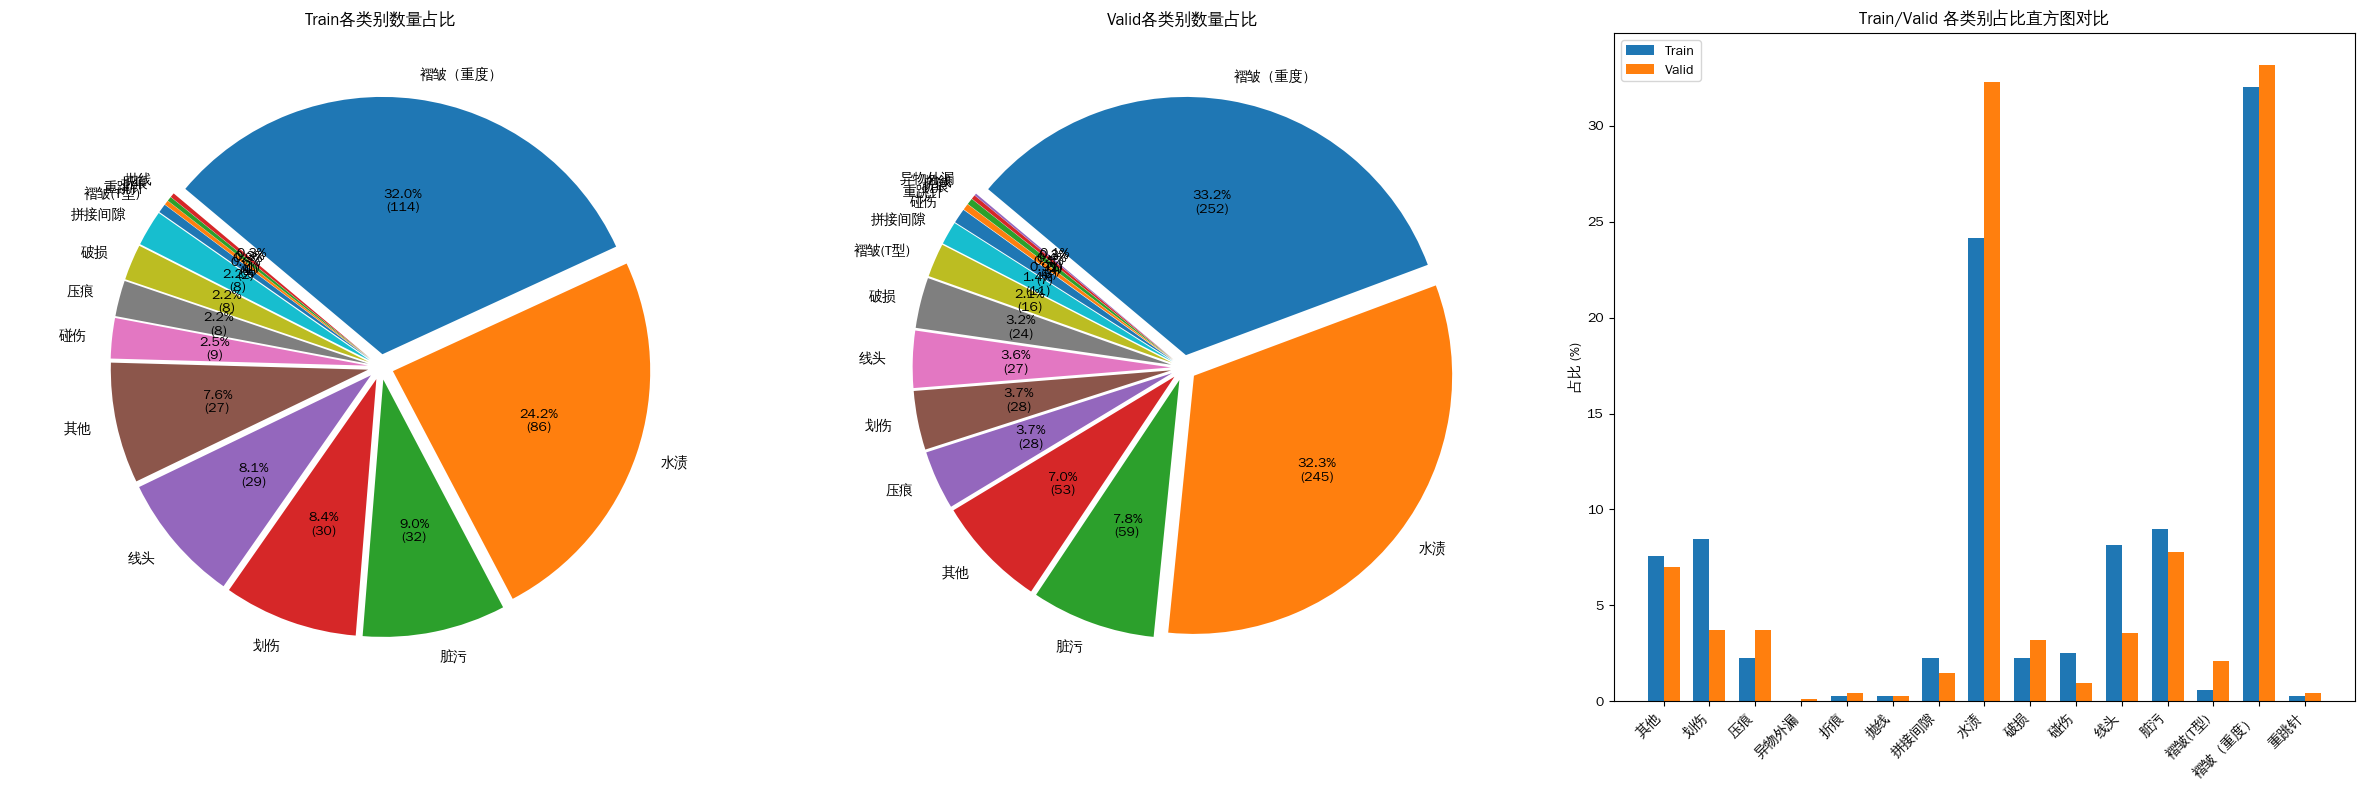

In [ ]:
def plot_class_distribution(train_ann, valid_ann):
    def get_count_df(ann):
        vc = ann['name'].value_counts()
        return pd.DataFrame({'数量': vc, '占比': 100 * vc / vc.sum()})

    df_train = get_count_df(train_ann)
    df_valid = get_count_df(valid_ann)

    all_labels = sorted(set(df_train.index).union(df_valid.index))
    train_counts = df_train.reindex(all_labels, fill_value=0)['数量']
    valid_counts = df_valid.reindex(all_labels, fill_value=0)['数量']
    train_percents = df_train.reindex(all_labels, fill_value=0)['占比']
    valid_percents = df_valid.reindex(all_labels, fill_value=0)['占比']

    fig, axes = plt.subplots(1, 3, figsize=(24, 8))  
    # 训练集饼图
    labels = df_train.index.tolist()
    values = df_train['数量'].tolist()
    percents = df_train['占比'].tolist()
    # 拼接数量和百分比
    def autopct_func(pct, allvals):
        absolute = int(round(pct/100.*np.sum(allvals)))
        return '{:.1f}%\n({:d})'.format(pct, absolute)
    explode = [0.05] * len(labels) if len(labels) > 6 else None
    axes[0].pie(
        values,
        labels=labels,
        autopct=lambda pct: autopct_func(pct, values),
        startangle=140,
        counterclock=False,
        explode=explode,
        textprops={'fontsize': 10}
    )
    axes[0].set_title('Train各类别数量占比')
    axes[0].axis('equal')

    # 验证集饼图
    labels = df_valid.index.tolist()
    values = df_valid['数量'].tolist()
    percents = df_valid['占比'].tolist()
    explode = [0.05] * len(labels) if len(labels) > 6 else None
    axes[1].pie(
        values,
        labels=labels,
        autopct=lambda pct: autopct_func(pct, values),
        startangle=140,
        counterclock=False,
        explode=explode,
        textprops={'fontsize': 10}
    )
    axes[1].set_title('Valid各类别数量占比')
    axes[1].axis('equal')

    # 直方图（百分比）
    x = np.arange(len(all_labels))
    width = 0.35
    axes[2].bar(x - width/2, train_percents, width, label='Train')
    axes[2].bar(x + width/2, valid_percents, width, label='Valid')
    axes[2].set_xticks(x)
    axes[2].set_xticklabels(all_labels, rotation=45, ha='right')
    axes[2].set_ylabel('占比 (%)')
    axes[2].set_title('Train/Valid 各类别占比直方图对比')
    axes[2].legend()

    plt.tight_layout()
    plt.show()

# 调用函数
plot_class_distribution(ann_train_coco['annotations'], ann_valid_coco['annotations'])

### 2.2 各类别缺陷像素area、x、y、w、h分布

#### 箱线图

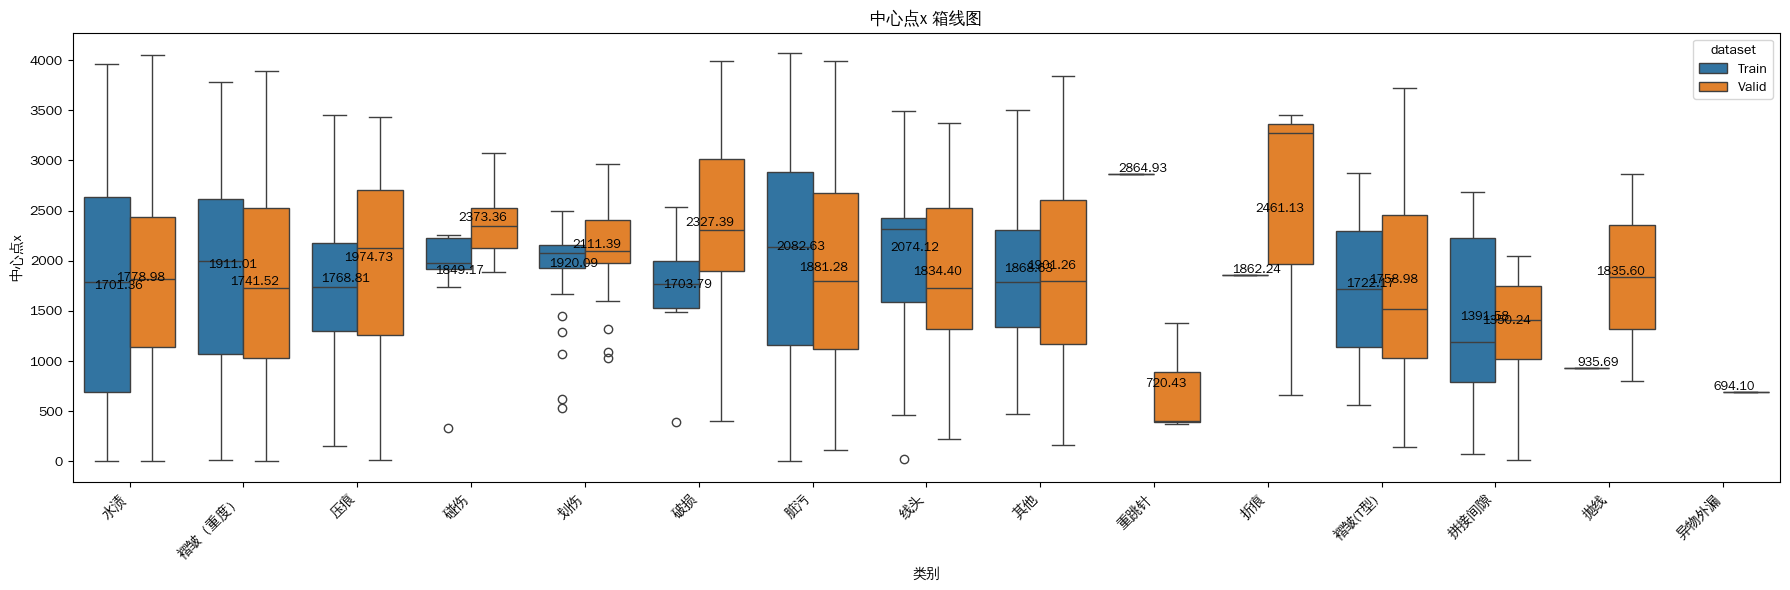

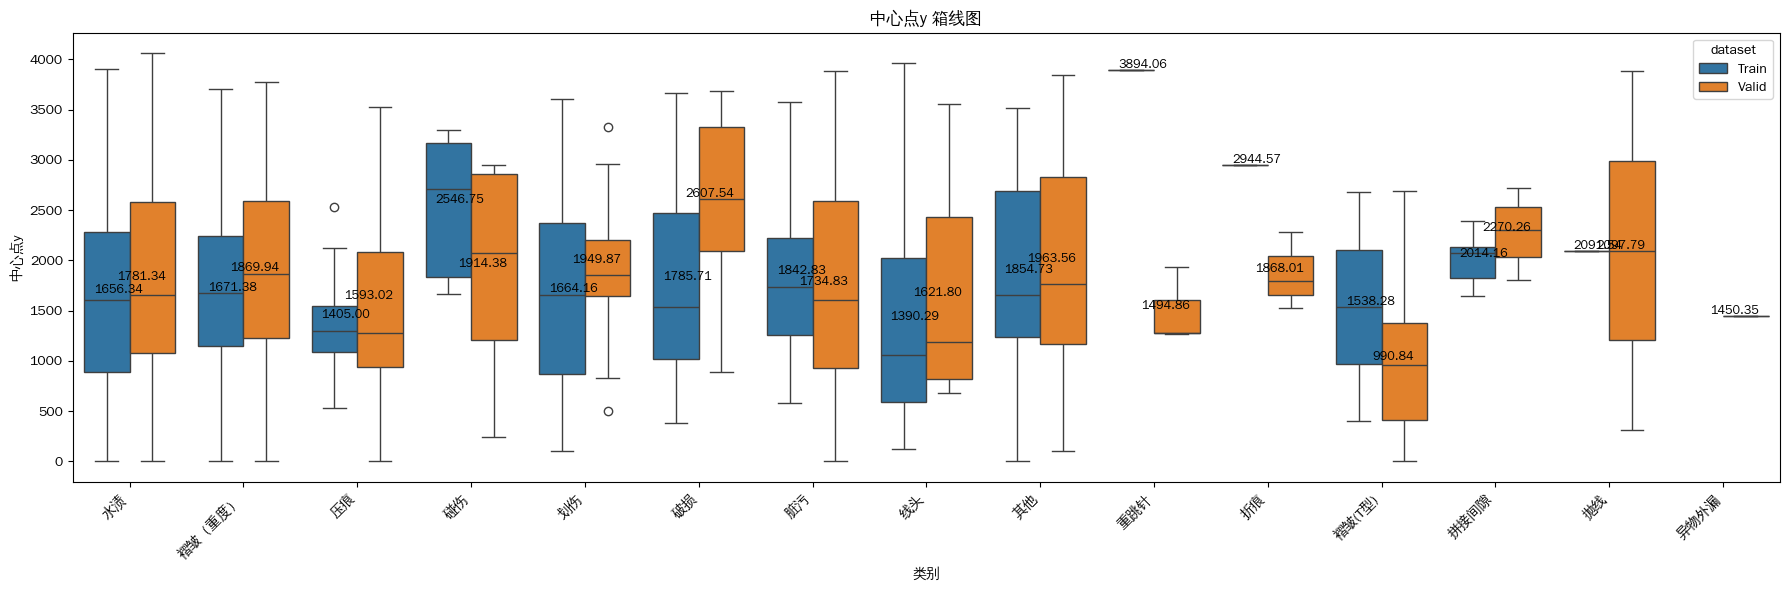

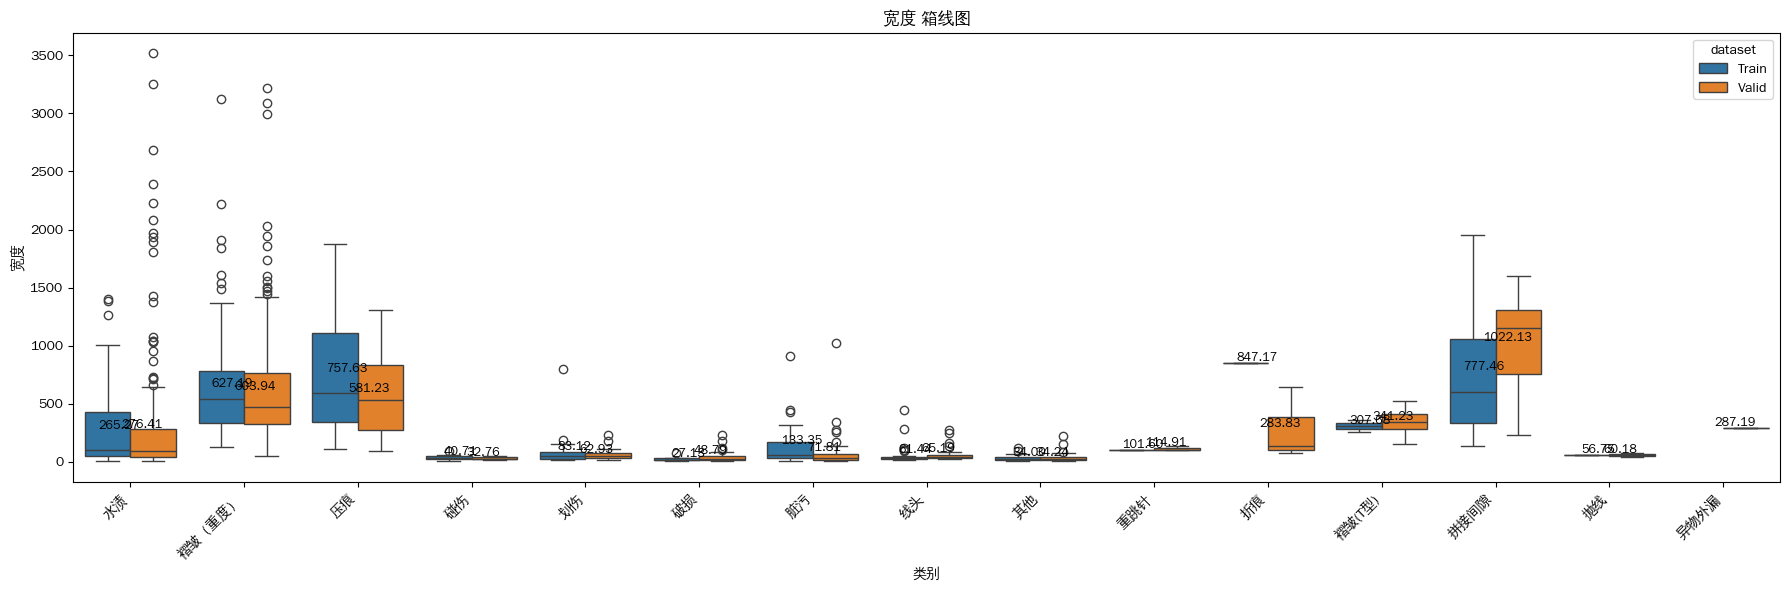

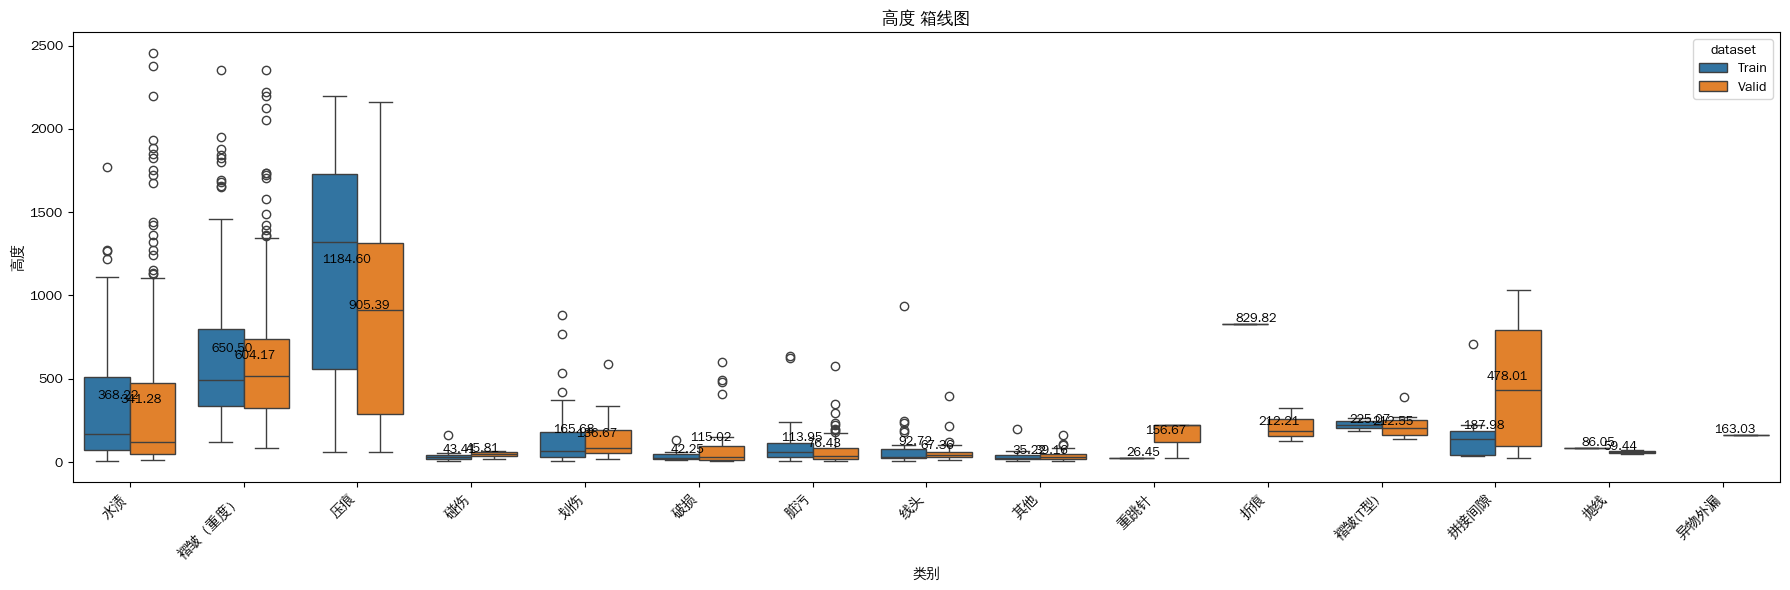

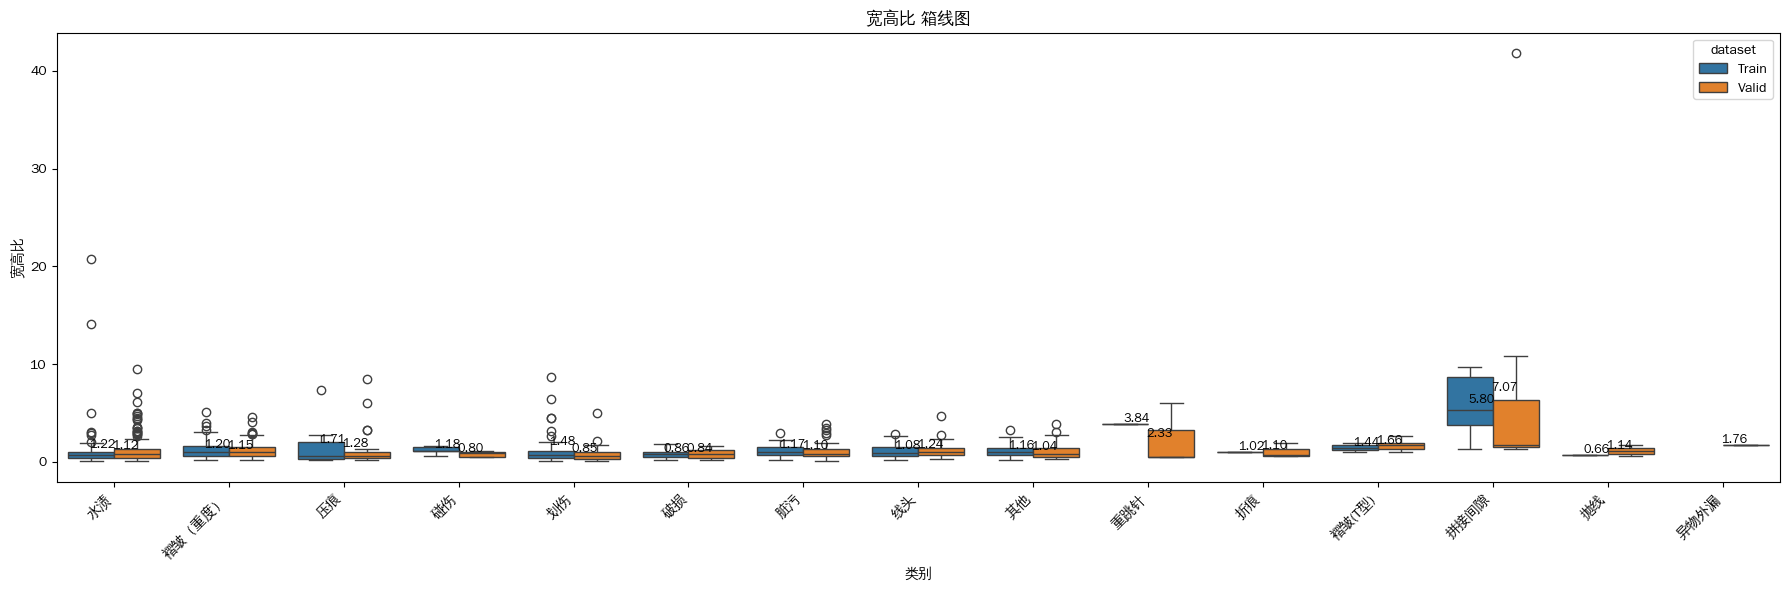

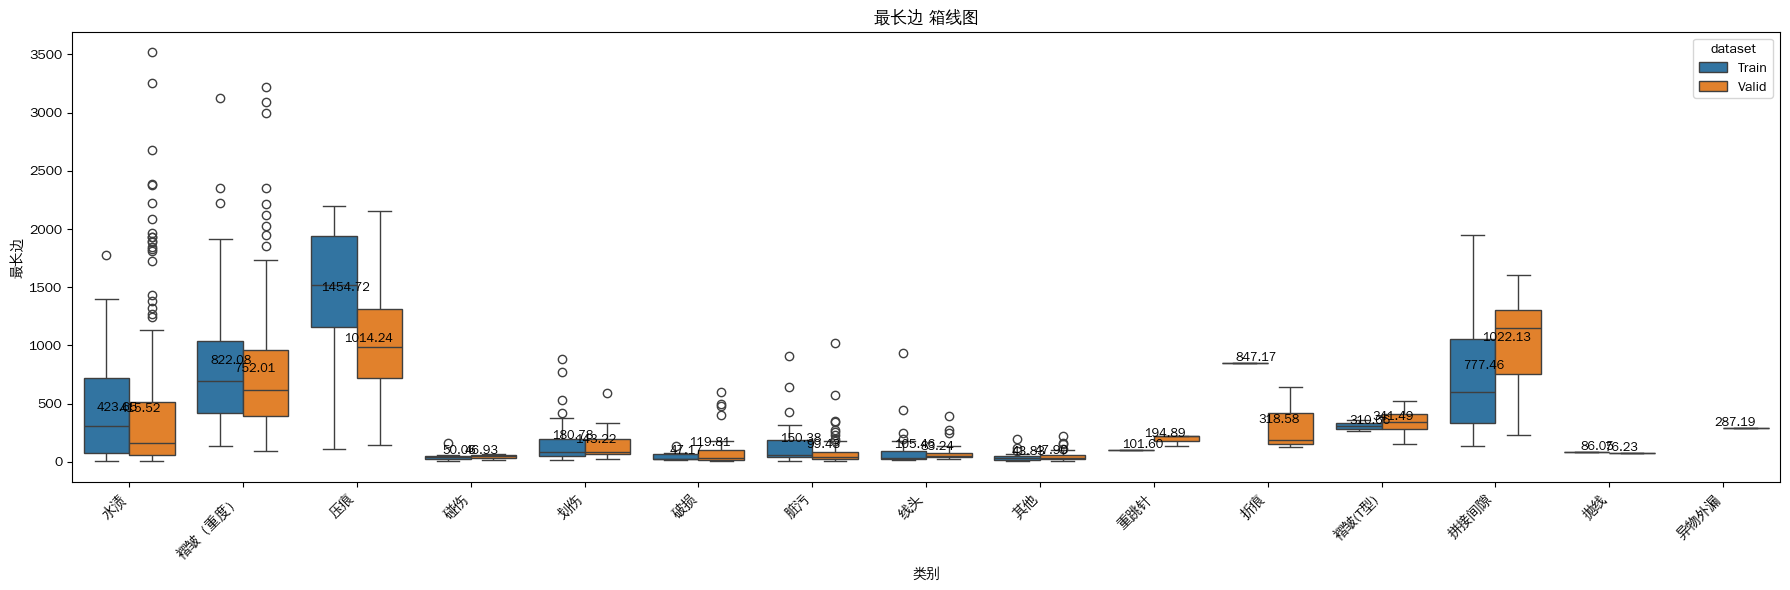

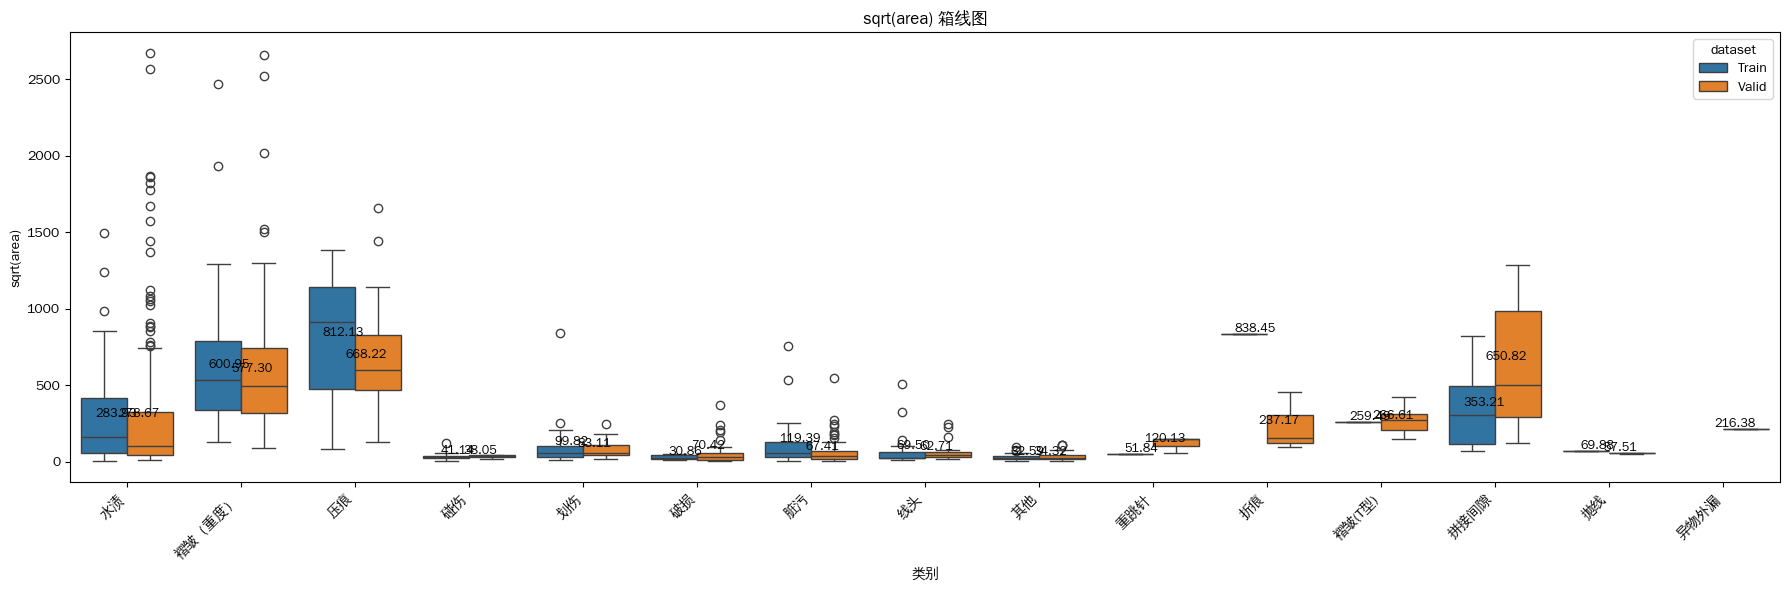

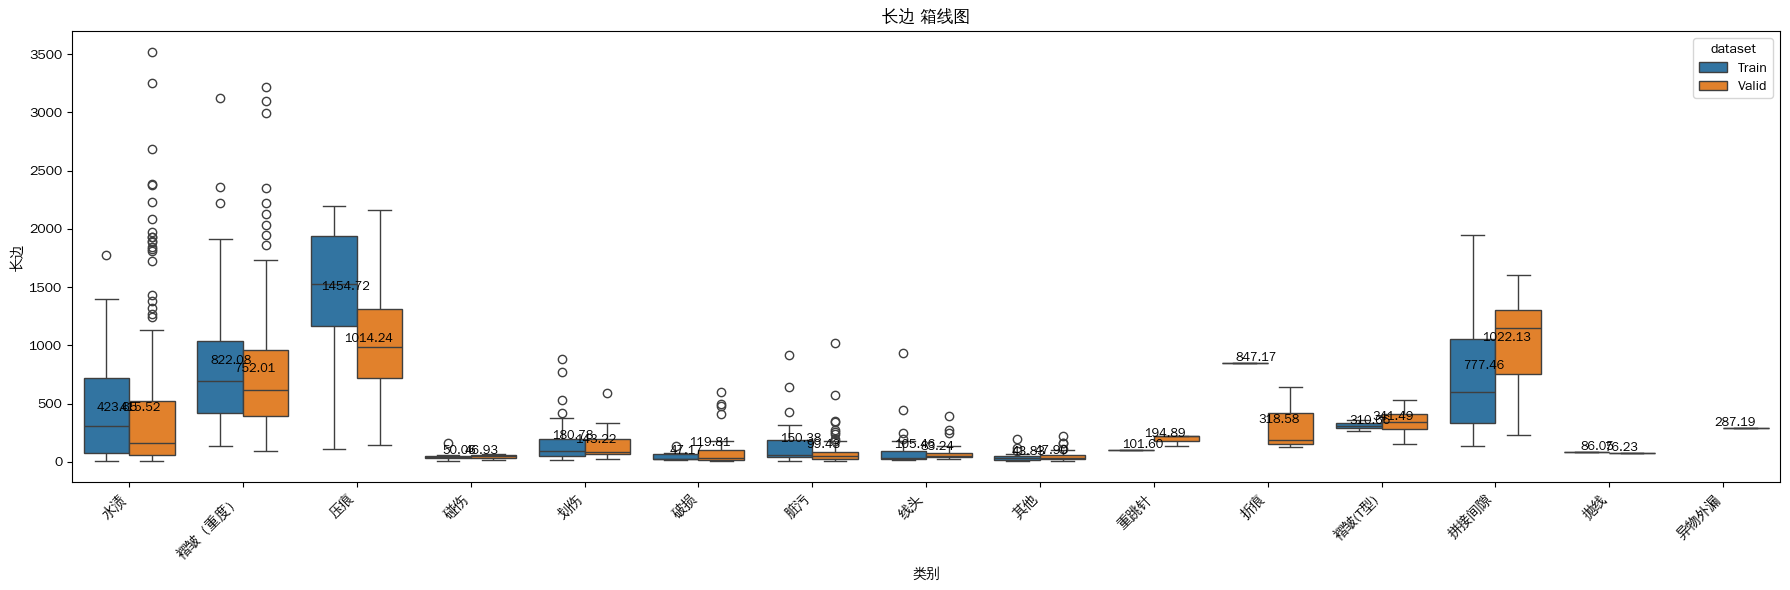

In [ ]:
def plot_boxplot_by_feature(df_train, df_valid, feature, ylabel, title):
    df1 = df_train[['name', feature]].copy()
    df1['dataset'] = 'Train'
    df2 = df_valid[['name', feature]].copy()
    df2['dataset'] = 'Valid'
    df = pd.concat([df1, df2], ignore_index=True)
    if feature == 'area':
        df['sqrt_area'] = df['area'].apply(lambda x: np.sqrt(x) if pd.notnull(x) and x >= 0 else np.nan)
        y = 'sqrt_area'
    elif feature == 'width':
        df['sqrt_width'] = df['width'].apply(lambda x: np.sqrt(x) if pd.notnull(x) and x >= 0 else np.nan)
        y = 'sqrt_width'
    elif feature == 'height':
        df['sqrt_height'] = df['height'].apply(lambda x: np.sqrt(x) if pd.notnull(x) and x >= 0 else np.nan)
        y = 'sqrt_height'
    elif feature == 'wh_ratio':
        df['wh_ratio'] = df.apply(lambda row: row['width'] / row['height'] if pd.notnull(row['width']) and pd.notnull(row['height']) and row['height'] > 0 else np.nan, axis=1)
        y = 'wh_ratio'
    elif feature == 'max_side':
        df['max_side'] = df.apply(lambda row: max(row['width'], row['height']) if pd.notnull(row['width']) and pd.notnull(row['height']) else np.nan, axis=1)
        y = 'max_side'
    else:
        y = feature
    plt.figure(figsize=(18, 6))
    ax = sns.boxplot(x='name', y=y, hue='dataset', data=df)
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.xlabel('类别')
    plt.ylabel(ylabel)
    # 在箱线图上显示均值数值
    group_means = df.groupby(['name', 'dataset'])[y].mean().reset_index()
    for i, name in enumerate(df['name'].unique()):
        for j, dataset in enumerate(['Train', 'Valid']):
            mean_val = group_means[(group_means['name'] == name) & (group_means['dataset'] == dataset)][y]
            if not mean_val.empty:
                # 计算每个箱线的位置
                n_datasets = 2
                offset = (j - 0.5) * 0.2  # 控制偏移
                ax.text(i + offset, mean_val.values[0], f'{mean_val.values[0]:.2f}', 
                        ha='center', va='bottom', fontsize=9, color='black')
    plt.tight_layout()
    plt.show()

def get_center(bbox):
    if isinstance(bbox, (list, tuple)) and len(bbox) == 4:
        x, y, w, h = bbox
        return x + w / 2, y + h / 2
    else:
        return np.nan, np.nan

def plot_center_distribution(df_train, df_valid):
    df1 = df_train[['name', 'bbox']].copy()
    df1['dataset'] = 'Train'
    df1[['center_x', 'center_y']] = df1['bbox'].apply(lambda b: pd.Series(get_center(b)))
    df2 = df_valid[['name', 'bbox']].copy()
    df2['dataset'] = 'Valid'
    df2[['center_x', 'center_y']] = df2['bbox'].apply(lambda b: pd.Series(get_center(b)))
    df = pd.concat([df1, df2], ignore_index=True)
    plt.figure(figsize=(18, 8))
    sns.scatterplot(x='center_x', y='center_y', hue='dataset', style='name', data=df, alpha=0.5)
    plt.title('缺陷中心点分布（Train/Valid）')
    plt.xlabel('中心x')
    plt.ylabel('中心y')
    plt.tight_layout()
    plt.show()

# 提取 x, y, w, h 以及宽高比、最长边，并绘制箱线图
def extract_bbox_features(df):
    df = df.copy()
    df[['x', 'y', 'w', 'h']] = df['bbox'].apply(lambda b: pd.Series(b) if isinstance(b, (list, tuple)) and len(b) == 4 else pd.Series([np.nan, np.nan, np.nan, np.nan]))
    # 计算宽高比
    df['wh_ratio'] = df.apply(lambda row: row['w'] / row['h'] if pd.notnull(row['w']) and pd.notnull(row['h']) and row['h'] > 0 else np.nan, axis=1)
    # 计算最长边
    df['max_side'] = df.apply(lambda row: max(row['w'], row['h']) if pd.notnull(row['w']) and pd.notnull(row['h']) else np.nan, axis=1)
    return df

# 合并训练集和验证集
train_bbox_df = extract_bbox_features(ann_train_coco['annotations'])
train_bbox_df['dataset'] = 'Train'
valid_bbox_df = extract_bbox_features(ann_valid_coco['annotations'])
valid_bbox_df['dataset'] = 'Valid'
bbox_df = pd.concat([train_bbox_df, valid_bbox_df], ignore_index=True)

# 绘制 x, y, w, h, wh_ratio, max_side 的箱线图，并在箱线图上显示均值
features = ['x', 'y', 'w', 'h', 'wh_ratio', 'max_side']
feature_names = {'x': '中心点x', 'y': '中心点y', 'w': '宽度', 'h': '高度', 'wh_ratio': '宽高比', 'max_side': '最长边'}
for feat in features:
    plt.figure(figsize=(18, 6))
    ax = sns.boxplot(x='name', y=feat, hue='dataset', data=bbox_df)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{feature_names[feat]} 箱线图')
    plt.xlabel('类别')
    plt.ylabel(feature_names[feat])
    # 在箱线图上显示均值数值
    group_means = bbox_df.groupby(['name', 'dataset'])[feat].mean().reset_index()
    for i, name in enumerate(bbox_df['name'].unique()):
        for j, dataset in enumerate(['Train', 'Valid']):
            mean_val = group_means[(group_means['name'] == name) & (group_means['dataset'] == dataset)][feat]
            if not mean_val.empty:
                n_datasets = 2
                offset = (j - 0.5) * 0.2
                ax.text(i + offset, mean_val.values[0], f'{mean_val.values[0]:.2f}', 
                        ha='center', va='bottom', fontsize=9, color='black')
    plt.tight_layout()
    plt.show()

# 面积分布箱线图
area_train_df = ann_train_coco['annotations'][['name', 'area']].copy()
area_train_df['dataset'] = 'Train'
area_valid_df = ann_valid_coco['annotations'][['name', 'area']].copy()
area_valid_df['dataset'] = 'Valid'

area_df = pd.concat([area_train_df, area_valid_df], ignore_index=True)
area_df['sqrt_area'] = area_df['area'].apply(lambda x: np.sqrt(x) if pd.notnull(x) and x >= 0 else np.nan)

plt.figure(figsize=(18, 6))
ax = sns.boxplot(x='name', y='sqrt_area', hue='dataset', data=area_df)
plt.xticks(rotation=45, ha='right')
plt.title('sqrt(area) 箱线图')
plt.xlabel('类别')
plt.ylabel('sqrt(area)')
# 在箱线图上显示均值数值
group_means = area_df.groupby(['name', 'dataset'])['sqrt_area'].mean().reset_index()
for i, name in enumerate(area_df['name'].unique()):
    for j, dataset in enumerate(['Train', 'Valid']):
        mean_val = group_means[(group_means['name'] == name) & (group_means['dataset'] == dataset)]['sqrt_area']
        if not mean_val.empty:
            n_datasets = 2
            offset = (j - 0.5) * 0.2
            ax.text(i + offset, mean_val.values[0], f'{mean_val.values[0]:.2f}', 
                    ha='center', va='bottom', fontsize=9, color='black')
plt.tight_layout()
plt.show()

# 最长边分布箱线图
max_side_train_df = train_bbox_df[['name', 'max_side']].copy()
max_side_train_df['dataset'] = 'Train'
max_side_valid_df = valid_bbox_df[['name', 'max_side']].copy()
max_side_valid_df['dataset'] = 'Valid'
max_side_df = pd.concat([max_side_train_df, max_side_valid_df], ignore_index=True)

plt.figure(figsize=(18, 6))
ax = sns.boxplot(x='name', y='max_side', hue='dataset', data=max_side_df)
plt.xticks(rotation=45, ha='right')
plt.title('长边 箱线图')
plt.xlabel('类别')
plt.ylabel('长边')
# 在箱线图上显示均值数值
group_means = max_side_df.groupby(['name', 'dataset'])['max_side'].mean().reset_index()
for i, name in enumerate(max_side_df['name'].unique()):
    for j, dataset in enumerate(['Train', 'Valid']):
        mean_val = group_means[(group_means['name'] == name) & (group_means['dataset'] == dataset)]['max_side']
        if not mean_val.empty:
            n_datasets = 2
            offset = (j - 0.5) * 0.2
            ax.text(i + offset, mean_val.values[0], f'{mean_val.values[0]:.2f}', 
                    ha='center', va='bottom', fontsize=9, color='black')
plt.tight_layout()
plt.show()


#### 均值、标准差分布(宽高比)

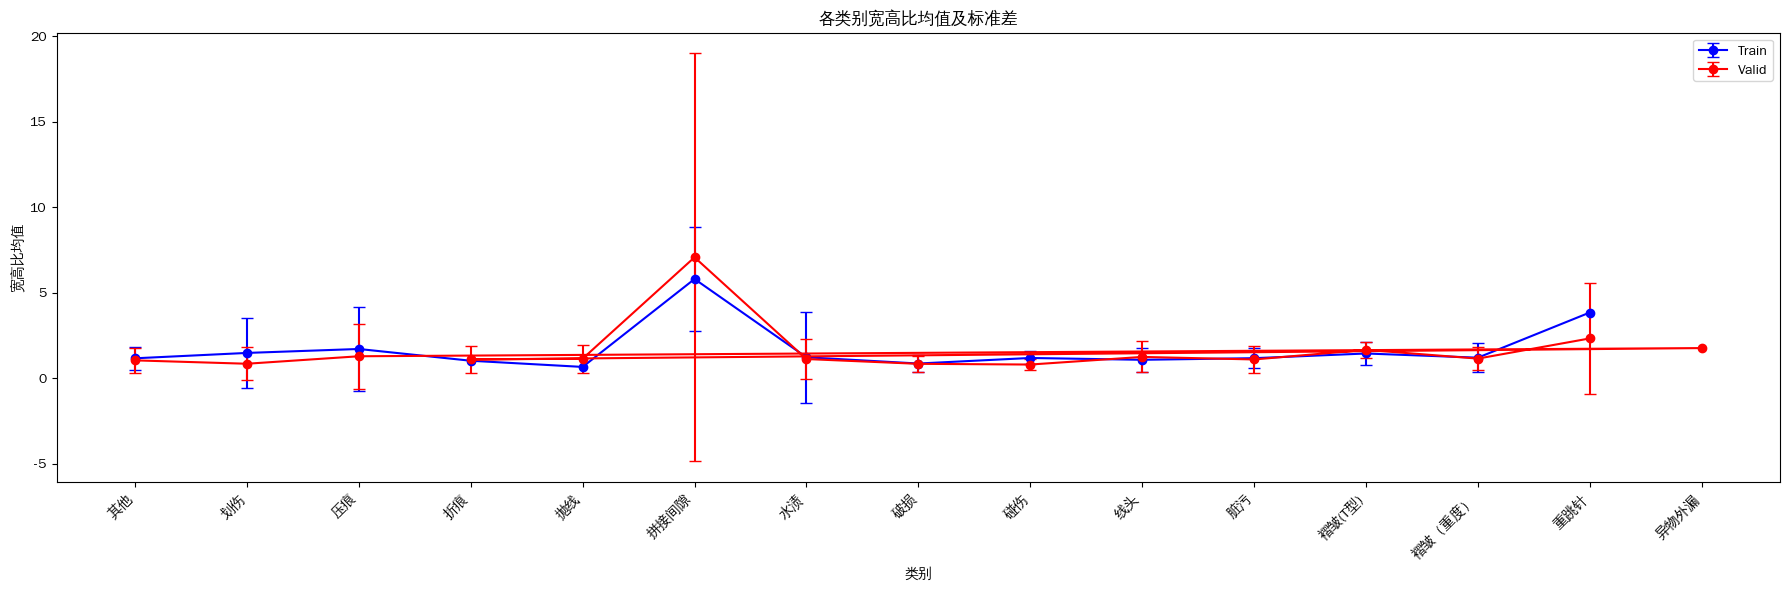

In [8]:
# 计算每个类别在Train和Valid中的宽高比均值和标准差
wh_ratio_stats = bbox_df.groupby(['name', 'dataset'])['wh_ratio'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(18, 6))
# 绘制Train和Valid的宽高比均值折线图，并加上标准差误差棒
for ds, color in zip(['Train', 'Valid'], ['b', 'r']):
    data = wh_ratio_stats[wh_ratio_stats['dataset'] == ds]
    plt.errorbar(data['name'], data['mean'], yerr=data['std'], marker='o', label=ds, color=color, capsize=4)
plt.xticks(rotation=45, ha='right')
plt.title('各类别宽高比均值及标准差')
plt.xlabel('类别')
plt.ylabel('宽高比均值')
plt.legend()
plt.tight_layout()
plt.show()


#### 中心点坐标、宽高 分布散点图

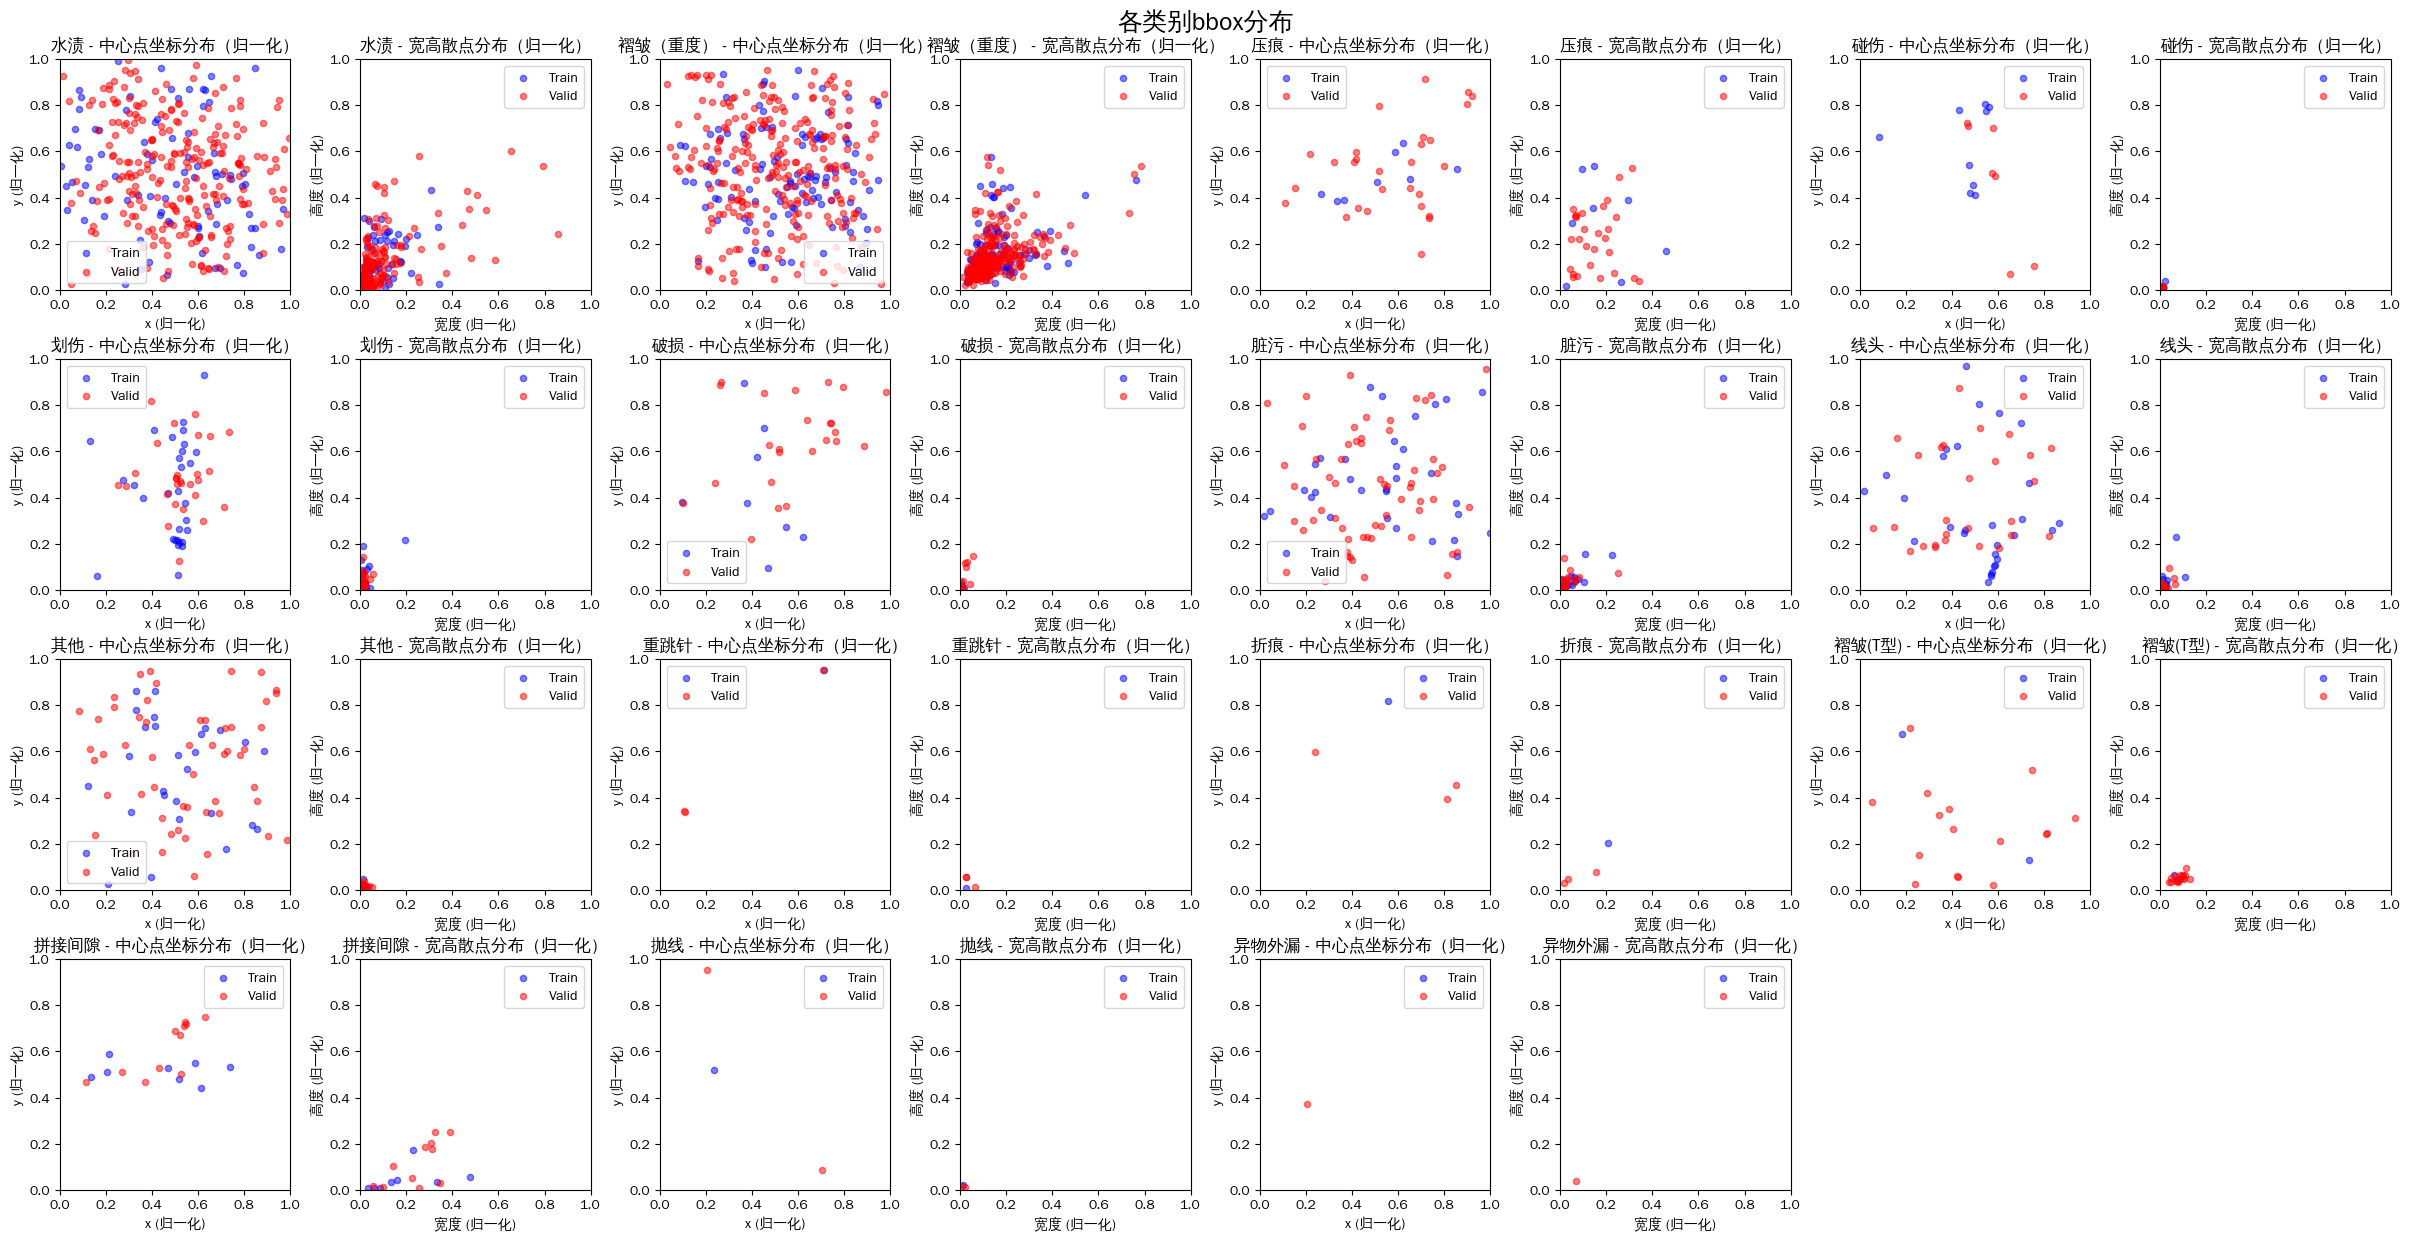

In [15]:
def plot_bbox_distributions(bbox_df):
    """
    每行并列4个类别，一共8张图（4个类别*2列），
    每个类别两列（中心点、宽高），坐标轴固定为0到1
    """
    norm_bbox_df = bbox_df.copy()
    norm_bbox_df['c_x_norm'] = norm_bbox_df['c_x'] / norm_bbox_df['width']
    norm_bbox_df['c_y_norm'] = norm_bbox_df['c_y'] / norm_bbox_df['height']
    norm_bbox_df['w_norm'] = norm_bbox_df['w'] / norm_bbox_df['width']
    norm_bbox_df['h_norm'] = norm_bbox_df['h'] / norm_bbox_df['height']
    categories = norm_bbox_df['name'].unique()
    n_cat = len(categories)
    n_cat_per_row = 4
    n_rows = (n_cat + n_cat_per_row - 1) // n_cat_per_row
    n_cols = n_cat_per_row * 2  # 每个类别两列

    # 调整figsize，使行之间更紧凑
    fig_height = 3 * n_rows  # 原本是6，改为3
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cat_per_row, fig_height), constrained_layout=True)

    if n_rows == 1:
        axes = axes.reshape(1, n_cols)
    elif n_cols == 1:
        axes = axes.reshape(n_rows, 1)

    for idx, cat in enumerate(categories):
        row = idx // n_cat_per_row
        col_base = (idx % n_cat_per_row) * 2

        ax1 = axes[row, col_base]
        for ds, color in zip(['Train', 'Valid'], ['b', 'r']):
            data = norm_bbox_df[(norm_bbox_df['name'] == cat) & (norm_bbox_df['dataset'] == ds)]
            ax1.scatter(data['c_x_norm'], data['c_y_norm'], alpha=0.5, s=20, label=ds, color=color)
        ax1.set_title(f'{cat} - 中心点坐标分布（归一化）')
        ax1.set_xlabel('x (归一化)')
        ax1.set_ylabel('y (归一化)')
        ax1.set_xlim(0, 1)
        ax1.set_ylim(0, 1)
        ax1.set_aspect('equal')
        ax1.legend()

        ax2 = axes[row, col_base + 1]
        for ds, color in zip(['Train', 'Valid'], ['b', 'r']):
            data = norm_bbox_df[(norm_bbox_df['name'] == cat) & (norm_bbox_df['dataset'] == ds)]
            ax2.scatter(data['w_norm'], data['h_norm'], alpha=0.5, s=20, label=ds, color=color)
        ax2.set_title(f'{cat} - 宽高散点分布（归一化）')
        ax2.set_xlabel('宽度 (归一化)')
        ax2.set_ylabel('高度 (归一化)')
        ax2.set_xlim(0, 1)
        ax2.set_ylim(0, 1)
        ax2.set_aspect('equal')
        ax2.legend()

    total_axes = n_rows * n_cols
    for i in range(n_cat * 2, total_axes):
        row = i // n_cols
        col = i % n_cols
        axes[row, col].axis('off')

    plt.suptitle('各类别bbox分布', y=1.02, fontsize=18)
    # 使用constrained_layout后不需要再用tight_layout
    plt.show()

plot_bbox_distributions(bbox_df)


### 2.3 颜色空间与明暗分布 

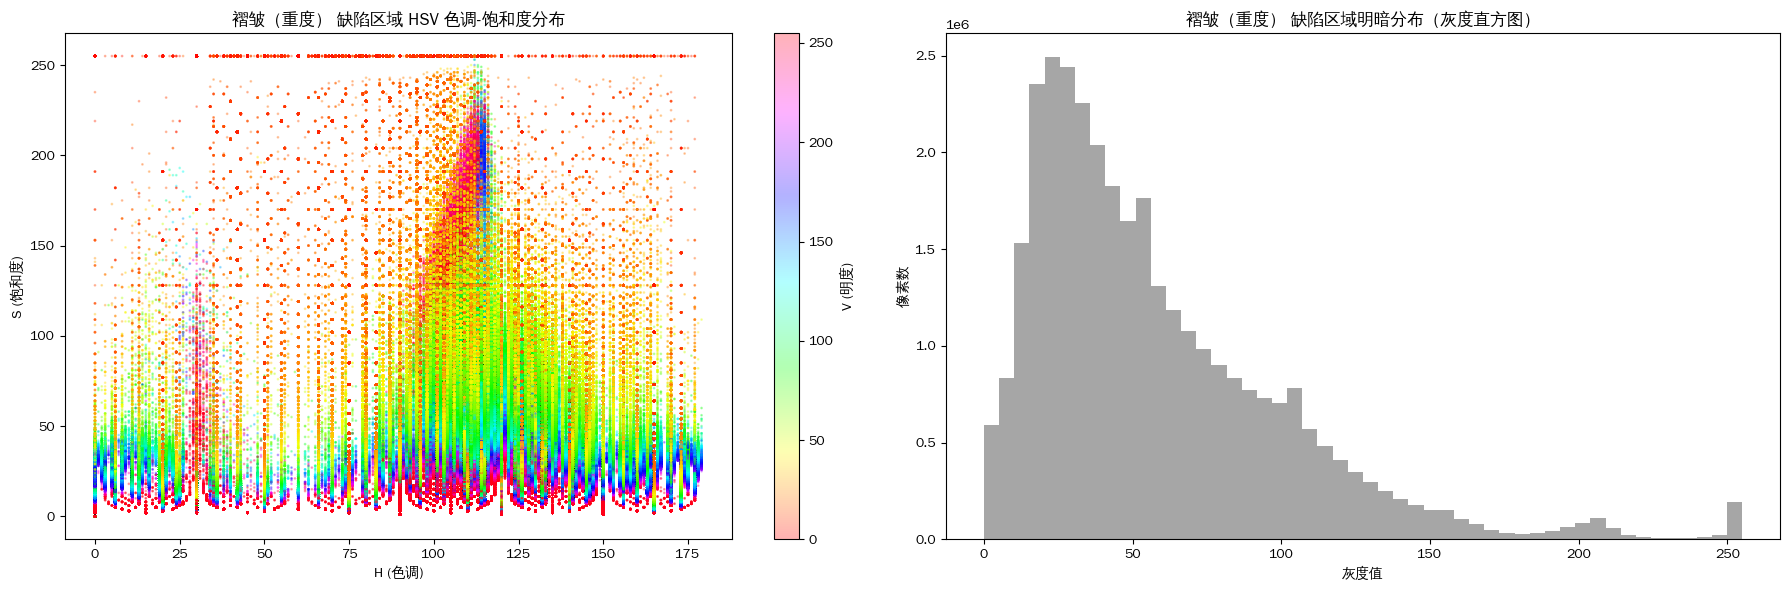

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_color_and_brightness_distribution(bbox_df, images_dir, category_name, n_samples=50):
    """
    指定类别，统计其bbox区域的颜色空间分布和明暗分布
    :param bbox_df: 包含bbox和类别信息的DataFrame
    :param images_dir: 图片文件夹路径
    :param category_name: 目标类别名称
    :param n_samples: 随机采样的bbox数量
    """
    # 过滤出指定类别的bbox
    cat_df = bbox_df[bbox_df['name'] == category_name]
    if len(cat_df) == 0:
        print(f"未找到类别 {category_name} 的数据")
        return

    # 随机采样
    cat_df = cat_df.sample(min(n_samples, len(cat_df)), random_state=42)

    hsv_pixels = []
    gray_pixels = []

    for idx, row in cat_df.iterrows():
        img_path = row['file_name'] if 'file_name' in row else row['file_name'] if 'file_name' in row else None
        if img_path is None:
            continue
        if not img_path.startswith(images_dir):
            img_path = f"{images_dir}/{img_path}"
        img = cv2.imread(img_path)
        if img is None:
            continue
        x, y, w, h = map(int, row['bbox'][:4])

        x = max(0, x)
        y = max(0, y)
        w = max(1, w)
        h = max(1, h)
        crop = img[y:y+h, x:x+w]
        if crop.size == 0:
            continue
        hsv = cv2.cvtColor(crop, cv2.COLOR_BGR2HSV)
        hsv_pixels.append(hsv.reshape(-1, 3))
        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
        gray_pixels.append(gray.flatten())

    if not hsv_pixels or not gray_pixels:
        print("未能提取到有效的像素数据")
        return

    hsv_pixels = np.concatenate(hsv_pixels, axis=0)
    gray_pixels = np.concatenate(gray_pixels, axis=0)

    plt.figure(figsize=(18, 6))

    # HSV空间分布
    plt.subplot(1, 2, 1)
    plt.scatter(hsv_pixels[:, 0], hsv_pixels[:, 1], s=1, alpha=0.3, c=hsv_pixels[:, 2], cmap='hsv')
    plt.xlabel('H (色调)')
    plt.ylabel('S (饱和度)')
    plt.title(f'{category_name} 缺陷区域 HSV 色调-饱和度分布')
    plt.colorbar(label='V (明度)')

    # 灰度直方图
    plt.subplot(1, 2, 2)
    plt.hist(gray_pixels, bins=50, color='gray', alpha=0.7)
    plt.xlabel('灰度值')
    plt.ylabel('像素数')
    plt.title(f'{category_name} 缺陷区域明暗分布（灰度直方图）')

    plt.tight_layout()
    plt.show()


plot_color_and_brightness_distribution(ann_train_coco['annotations'], images_dir=train_dir, category_name='褶皱（重度）', n_samples=50)


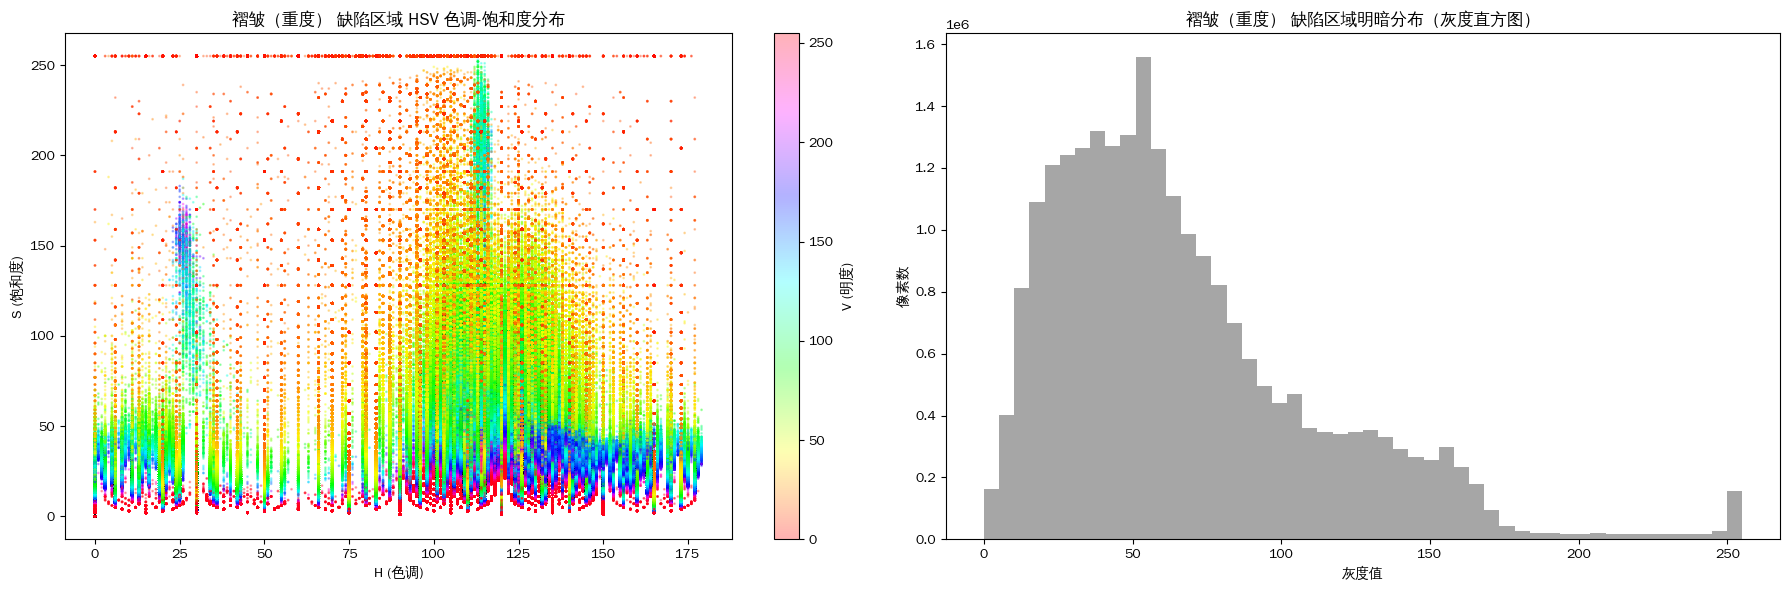

In [ ]:
plot_color_and_brightness_distribution(ann_valid_coco['annotations'], images_dir=valid_dir, category_name='褶皱（重度）', n_samples=50)